In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv = "data/city_data.csv"
csv2 = "data/ride_data.csv"

# Read the City and Ride Data
data = pd.read_csv(csv)
data2 = pd.read_csv(csv2)

# Combine the data into a single dataset
merged_data = pd.merge(data, data2, on= 'city')


In [2]:
# Changed order of column names 
merged_data = merged_data[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]

# Renamed column names for redability and astetics 
merged_data = merged_data.rename(columns={'city': "City",
                                   'date':'Date',
                                   'fare':'Fare',
                                   'ride_id':'Ride ID',
                                   'driver_count': 'Driver Count',
                                   'type': 'Type'})
merged_data.head()

,City,Date,Fare,Ride ID,Driver Count,Type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [3]:
# created a groupby with 'type' and 'city'
grouped_data = merged_data.groupby(["Type","City"])

In [4]:
avg_fare_per_city = grouped_data["Fare"].mean()

urban_avg_fare = avg_fare_per_city["Urban"]
suburban_avg_fare = avg_fare_per_city["Suburban"]
rural_avg_fare = avg_fare_per_city["Rural"]

In [5]:
# used groupby to find the count of citites per city type  
city_type_count = grouped_data["City"].count()

urban_count = city_type_count["Urban"]
suburban_count = city_type_count["Suburban"]
rural_count = city_type_count["Rural"]


In [6]:
# used groupby to find driver count per city type 
driver_count_per_city = grouped_data["Driver Count"].unique()

urban_driver_count = driver_count_per_city["Urban"].astype(int)
suburban_driver_count = driver_count_per_city["Suburban"].astype(int)
rural_driver_count = driver_count_per_city["Rural"].astype(int)


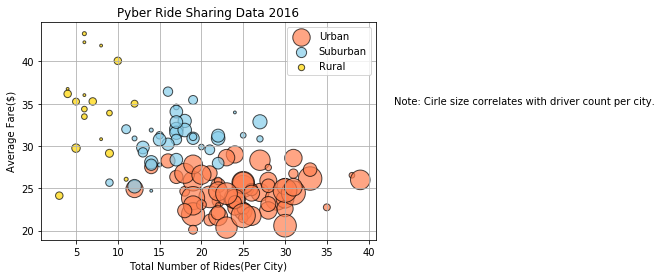

In [7]:
# Build the scatter plots for each city types
plt.scatter(urban_count, urban_avg_fare, marker="o", facecolors="coral", edgecolors="black", alpha=0.7, label="Urban",s=urban_driver_count*8,)
plt.scatter(suburban_count, suburban_avg_fare, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.7, s=suburban_driver_count*8, label="Suburban")
plt.scatter(rural_count, rural_avg_fare, marker="o", facecolors="gold", edgecolors="black", alpha=0.7, s=rural_driver_count*8, label="Rural")


plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

plt.text(43,35, 'Note: Cirle size correlates with driver count per city.')
plt.grid()
plt.legend(loc="best")

plt.show()


In [8]:
# used original dataframe to find total fare sum 
total_fare_sum = merged_data["Fare"].sum()

# seperated dataframe by city type using the loc function then summed thier fare 
urban_data = merged_data.loc[merged_data["Type"] == "Urban"]
suburban_data = merged_data.loc[merged_data["Type"] == "Suburban"]
rural_data = merged_data.loc[merged_data["Type"] == "Rural"]

sum_urban_fare = urban_data["Fare"].sum()
sum_suburban_fare = suburban_data["Fare"].sum()
sum_rural_fare = rural_data["Fare"].sum()


In [9]:
# basic math to find fare percentage by city type 
urban_fare_percentage = round(((sum_urban_fare / total_fare_sum)*100), 1)

suburban_fare_percentage = round(((sum_suburban_fare / total_fare_sum)*100), 1)

rural_fare_percentage = round(((sum_rural_fare / total_fare_sum)*100), 1)


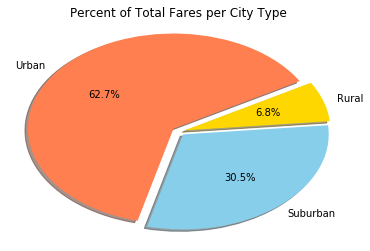

In [10]:
# built pie chart 
areas = [urban_fare_percentage, suburban_fare_percentage, rural_fare_percentage]

labels = ['Urban', 'Suburban', 'Rural']

colors = ['coral','skyblue','gold']

explode = [0.05, 0.04, 0.04]


plt.pie(areas, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=30)

plt.title('Percent of Total Fares per City Type')

plt.axis('tight')

plt.show()

In [11]:
# Used variable set in In[8] to figure out total rides per city type
total_rides = len(merged_data)

urban_t_rides = len(urban_data)
suburban_t_rides = len(suburban_data)
rural_t_rides = len(rural_data)


Text(0.5, 1.0, 'Percent of Total Rides per City Type')

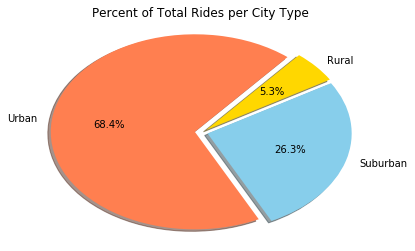

In [12]:
# built pie chart 
areas2 = [urban_t_rides, suburban_t_rides, rural_t_rides]

labels2 = ['Urban', 'Suburban', 'Rural']

colors2 = ['coral','skyblue','gold']

explode2 = [0.05, 0.04, 0.04]

plt.pie(areas2, labels=labels2, colors=colors2, explode=explode2, autopct="%1.1f%%", 
        shadow=True, startangle=50 )

plt.axis('tight')

plt.title('Percent of Total Rides per City Type')


In [13]:
# Used groupby and values from In[6]to arrive at total driver count 
# & total driver count per city type 

driver_count_per_city = driver_count_per_city.astype(int)
total_driver_count = driver_count_per_city.sum()

percent_urban_driver_count = round(((urban_driver_count.sum() / total_driver_count)*100),1)
percent_suburban_driver_count = round(((suburban_driver_count.sum() / total_driver_count)*100),1)
percent_rural_driver_count = round(((rural_driver_count.sum() / total_driver_count)*100),1)

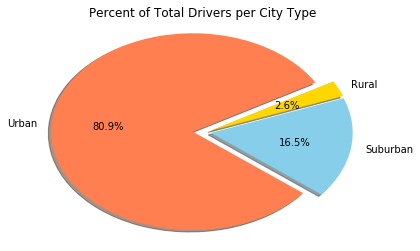

In [14]:
# built pie chart 
areas3 = [percent_urban_driver_count, percent_suburban_driver_count, percent_rural_driver_count]

labels3 = ['Urban', 'Suburban', 'Rural']

colors3 = ['coral','skyblue','gold']

explode3 = [0.09, 0.04, 0.04]


plt.pie(areas3, explode=explode3, labels=labels3, colors=colors3, autopct="%1.1f%%",
        shadow=True, startangle=30)

plt.title('Percent of Total Drivers per City Type')
plt.axis('tight')
plt.show()
 